In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import shutil 
import seaborn as sns
import random

## Controls datset split

In [17]:
controls_pd_nifti = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/dcm2nii_controls/scan.csv")
controls_pd_nifti = controls_pd_nifti.sort_values(by = ['PatientID'])
controls_pd_nifti.drop(columns = ['StudyDate', 'Modality', 'BodyPart'], inplace = True)
controls_pd_nifti.reset_index(drop = True, inplace = True)
#Find the counts of kernels 
controls_pd_nifti

,PatientID,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
0,COPDGene_A61757,GE MEDICAL SYSTEMS,0.625,521,521,325.625,1.2.840.113619.2.55.3.2831167752.649.124715154...,BONE,0.625,120.0,360.0,500,400,2,1.375
1,COPDGene_A61757,GE MEDICAL SYSTEMS,0.625,524,524,327.500,1.2.840.113619.2.55.3.2831167752.649.124715154...,STANDARD,0.625,120.0,360.0,500,100,0,1.375
2,COPDGene_B15777,GE MEDICAL SYSTEMS,0.625,457,457,285.625,1.2.840.113619.2.55.1.1762928497.1882.12119709...,STANDARD,0.625,120.0,360.0,478,100,1087,NaN
3,COPDGene_B15777,GE MEDICAL SYSTEMS,0.625,458,458,286.250,1.2.840.113619.2.55.1.1762928497.1882.12119709...,BONE,0.625,120.0,360.0,478,400,4349,NaN
4,COPDGene_B17236,GE MEDICAL SYSTEMS,0.625,471,471,294.375,1.2.840.113619.2.108.1627440376.17625.12289430...,BONE,0.625,120.0,330.0,505,400,9,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,COPDGene_P70727,GE MEDICAL SYSTEMS,0.625,412,412,257.500,1.2.840.113619.2.55.3.2831167752.725.124507889...,STANDARD,0.625,120.0,360.0,500,100,0,1.375
107,COPDGene_P97581,GE MEDICAL SYSTEMS,0.625,395,395,246.875,1.2.840.113619.2.108.1627440376.29691.12438656...,STANDARD,0.625,120.0,360.0,478,100,2,1.375
108,COPDGene_P97581,GE MEDICAL SYSTEMS,0.625,480,480,300.000,1.2.840.113619.2.108.1627440376.29672.12438655...,BONE,0.625,120.0,360.0,505,400,9,1.375
109,COPDGene_Q74297,GE MEDICAL SYSTEMS,0.625,406,406,253.750,1.2.840.113619.2.55.3.3852317604.154.129682109...,STANDARD,0.625,120.0,325.0,500,100,1,1.375


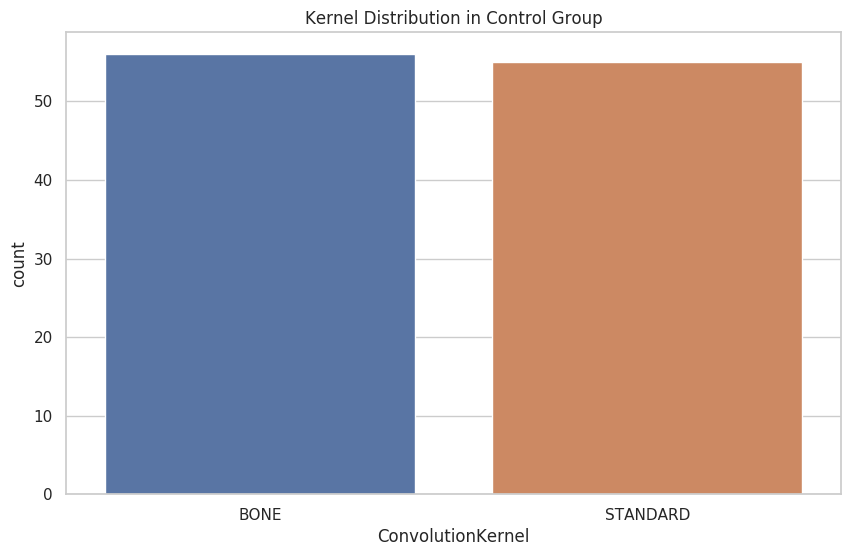

In [18]:
sns.set(style = "whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="ConvolutionKernel", data=controls_pd_nifti)
plt.title("Kernel Distribution in Control Group")
plt.show()

In [19]:
counts  = controls_pd_nifti.groupby(['PatientID']).size().reset_index(name = 'Counts')
counts 

,PatientID,Counts
0,COPDGene_A61757,2
1,COPDGene_B15777,2
2,COPDGene_B17236,2
3,COPDGene_B17317,2
4,COPDGene_B38216,2
5,COPDGene_B72303,2
6,COPDGene_C05262,2
7,COPDGene_C11750,2
8,COPDGene_C19536,2
9,COPDGene_C40785,2


In [20]:
#Keep the patients with 2 scans
counts = counts[counts['Counts'] == 2]
counts = counts.reset_index(drop = True)
counts

,PatientID,Counts
0,COPDGene_A61757,2
1,COPDGene_B15777,2
2,COPDGene_B17236,2
3,COPDGene_B17317,2
4,COPDGene_B38216,2
5,COPDGene_B72303,2
6,COPDGene_C05262,2
7,COPDGene_C11750,2
8,COPDGene_C19536,2
9,COPDGene_C40785,2


In [21]:
#Apply the filter to the original dataframe
controls_pd_nifti = controls_pd_nifti[controls_pd_nifti['PatientID'].isin(counts['PatientID'])]
controls_pd_nifti = controls_pd_nifti.reset_index(drop = True)
controls_pd_nifti

,PatientID,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
0,COPDGene_A61757,GE MEDICAL SYSTEMS,0.625,521,521,325.625,1.2.840.113619.2.55.3.2831167752.649.124715154...,BONE,0.625,120.0,360.0,500,400,2,1.375
1,COPDGene_A61757,GE MEDICAL SYSTEMS,0.625,524,524,327.500,1.2.840.113619.2.55.3.2831167752.649.124715154...,STANDARD,0.625,120.0,360.0,500,100,0,1.375
2,COPDGene_B15777,GE MEDICAL SYSTEMS,0.625,457,457,285.625,1.2.840.113619.2.55.1.1762928497.1882.12119709...,STANDARD,0.625,120.0,360.0,478,100,1087,NaN
3,COPDGene_B15777,GE MEDICAL SYSTEMS,0.625,458,458,286.250,1.2.840.113619.2.55.1.1762928497.1882.12119709...,BONE,0.625,120.0,360.0,478,400,4349,NaN
4,COPDGene_B17236,GE MEDICAL SYSTEMS,0.625,471,471,294.375,1.2.840.113619.2.108.1627440376.17625.12289430...,BONE,0.625,120.0,330.0,505,400,9,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,COPDGene_P70727,GE MEDICAL SYSTEMS,0.625,412,412,257.500,1.2.840.113619.2.55.3.2831167752.725.124507889...,STANDARD,0.625,120.0,360.0,500,100,0,1.375
106,COPDGene_P97581,GE MEDICAL SYSTEMS,0.625,395,395,246.875,1.2.840.113619.2.108.1627440376.29691.12438656...,STANDARD,0.625,120.0,360.0,478,100,2,1.375
107,COPDGene_P97581,GE MEDICAL SYSTEMS,0.625,480,480,300.000,1.2.840.113619.2.108.1627440376.29672.12438655...,BONE,0.625,120.0,360.0,505,400,9,1.375
108,COPDGene_Q74297,GE MEDICAL SYSTEMS,0.625,406,406,253.750,1.2.840.113619.2.55.3.3852317604.154.129682109...,STANDARD,0.625,120.0,325.0,500,100,1,1.375


In [23]:
# Reset index
controls_pd_nifti.reset_index(drop=True, inplace=True)

# Pivot the dataframe
pivot_df = controls_pd_nifti.pivot(index='PatientID', columns='ConvolutionKernel', values='SeriesUID').reset_index()

# Rename columns for clarity
pivot_df.columns.name = None
pivot_df.rename(columns={'BONE': 'SeriesUID_BONE', 'STANDARD': 'SeriesUID_STANDARD'}, inplace=True)

# Display the transformed dataframe
pivot_df

,PatientID,SeriesUID_BONE,SeriesUID_STANDARD
0,COPDGene_A61757,1.2.840.113619.2.55.3.2831167752.649.124715154...,1.2.840.113619.2.55.3.2831167752.649.124715154...
1,COPDGene_B15777,1.2.840.113619.2.55.1.1762928497.1882.12119709...,1.2.840.113619.2.55.1.1762928497.1882.12119709...
2,COPDGene_B17236,1.2.840.113619.2.108.1627440376.17625.12289430...,1.2.840.113619.2.108.1627440376.17625.12289430...
3,COPDGene_B17317,1.2.840.113619.2.55.3.279720240.266.1262968325...,1.2.840.113619.2.55.3.279720240.266.1262968325...
4,COPDGene_B38216,1.2.840.113619.2.55.3.2831167752.615.125121230...,1.2.840.113619.2.55.3.2831167752.615.125121230...
5,COPDGene_B72303,1.2.840.113619.2.181.33975605383.15934.1228750...,1.2.840.113619.2.181.33975605383.15934.1228750...
6,COPDGene_C05262,1.2.840.113619.2.55.3.2474697517.580.125300873...,1.2.840.113619.2.55.3.2474697517.580.125300874...
7,COPDGene_C11750,1.2.840.113619.2.181.33975596212.25851.1225315...,1.2.840.113619.2.181.33975596212.25851.1225315...
8,COPDGene_C19536,1.2.840.113619.2.55.3.2831167752.750.124991734...,1.2.840.113619.2.55.3.2831167752.750.124991734...
9,COPDGene_C40785,1.2.840.113619.2.55.3.2831167752.940.130141137...,1.2.840.113619.2.55.3.2831167752.940.130141137...


In [25]:
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2
pids = pivot_df['PatientID'].unique()
random.shuffle(pids)
num_pids = len(pids)

n_train = int(round(num_pids * train_ratio))
n_val = int(round(num_pids * val_ratio))
n_test = int(round(num_pids * test_ratio))

train_pids = pids[:n_train]
val_pids = pids[n_train:(n_train + n_val)]
test_pids = pids[(n_train + n_val):]

train_pids, val_pids, test_pids


(array(['COPDGene_C64303', 'COPDGene_C53764', 'COPDGene_E25387',
        'COPDGene_H84833', 'COPDGene_C05262', 'COPDGene_C97237',
        'COPDGene_F58892', 'COPDGene_L91926', 'COPDGene_P97581',
        'COPDGene_G26252', 'COPDGene_M25958', 'COPDGene_G85131',
        'COPDGene_B15777', 'COPDGene_F56917', 'COPDGene_C98853',
        'COPDGene_B72303', 'COPDGene_J39758', 'COPDGene_G78431',
        'COPDGene_J27810', 'COPDGene_P70727', 'COPDGene_H22186',
        'COPDGene_D85728', 'COPDGene_N07892', 'COPDGene_B17317',
        'COPDGene_B38216', 'COPDGene_F79779', 'COPDGene_D32260',
        'COPDGene_J44870', 'COPDGene_D41724', 'COPDGene_Q74297',
        'COPDGene_F68346', 'COPDGene_E73754', 'COPDGene_D54151'],
       dtype=object),
 array(['COPDGene_C73437', 'COPDGene_F81615', 'COPDGene_J54714',
        'COPDGene_C43149', 'COPDGene_D78779', 'COPDGene_L40268',
        'COPDGene_F75268', 'COPDGene_C11750', 'COPDGene_L24131',
        'COPDGene_C19536', 'COPDGene_D80990'], dtype=object),
 arra

In [26]:
for index,row in pivot_df.iterrows():
    pid = row['PatientID']
    if pid in train_pids:
        split = 'train'
    elif pid in val_pids:
        split = 'val'
    elif pid in test_pids:
        split = 'test'
    else:
        raise ValueError(f"PID {pid} not found in any split")
    pivot_df.loc[index, 'split'] = split

In [27]:
pivot_df

,PatientID,SeriesUID_BONE,SeriesUID_STANDARD,split
0,COPDGene_A61757,1.2.840.113619.2.55.3.2831167752.649.124715154...,1.2.840.113619.2.55.3.2831167752.649.124715154...,test
1,COPDGene_B15777,1.2.840.113619.2.55.1.1762928497.1882.12119709...,1.2.840.113619.2.55.1.1762928497.1882.12119709...,train
2,COPDGene_B17236,1.2.840.113619.2.108.1627440376.17625.12289430...,1.2.840.113619.2.108.1627440376.17625.12289430...,test
3,COPDGene_B17317,1.2.840.113619.2.55.3.279720240.266.1262968325...,1.2.840.113619.2.55.3.279720240.266.1262968325...,train
4,COPDGene_B38216,1.2.840.113619.2.55.3.2831167752.615.125121230...,1.2.840.113619.2.55.3.2831167752.615.125121230...,train
5,COPDGene_B72303,1.2.840.113619.2.181.33975605383.15934.1228750...,1.2.840.113619.2.181.33975605383.15934.1228750...,train
6,COPDGene_C05262,1.2.840.113619.2.55.3.2474697517.580.125300873...,1.2.840.113619.2.55.3.2474697517.580.125300874...,train
7,COPDGene_C11750,1.2.840.113619.2.181.33975596212.25851.1225315...,1.2.840.113619.2.181.33975596212.25851.1225315...,val
8,COPDGene_C19536,1.2.840.113619.2.55.3.2831167752.750.124991734...,1.2.840.113619.2.55.3.2831167752.750.124991734...,val
9,COPDGene_C40785,1.2.840.113619.2.55.3.2831167752.940.130141137...,1.2.840.113619.2.55.3.2831167752.940.130141137...,test


In [29]:
pivot_df.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/COPD_controls_SPIE.csv", index = False)

## Cases data split

In [13]:
sample_100 = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/dcm2nii/scan.csv")
sample_additional = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/dcm2nii_additional_sample/scan.csv")

main_copd_ge = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/final_paired_data_spreadsheets/COPD_GE_pairedkernels_100randomsamples_GOLDlabels.csv")
main_copd_ge

,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration,Body Site,Case/control,Consent code,Consent,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,COPDGene_A16009,BONE,COPDGene_A16009_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,chest,case,1,HMB,phs000179,GOLD_2,CT,d1978801,Caucasian,female
1,COPDGene_A16009,STANDARD,COPDGene_A16009_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_2,CT,d1978801,Caucasian,female
2,COPDGene_A24802,STANDARD,COPDGene_A24802_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_4,CT,d1991634,Caucasian,male
3,COPDGene_A24802,BONE,COPDGene_A24802_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,chest,case,1,HMB,phs000179,GOLD_4,CT,d1991634,Caucasian,male
4,COPDGene_A43240,STANDARD,COPDGene_A43240_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_2,CT,d1978082,Caucasian,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,COPDGene_Q53566,STANDARD,COPDGene_Q53566_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_3,CT,d1979703,Caucasian,male
196,COPDGene_Q59293,BONE,COPDGene_Q59293_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,chest,case,1,HMB,phs000179,GOLD_2,CT,d1990430,African,female
197,COPDGene_Q59293,STANDARD,COPDGene_Q59293_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_2,CT,d1990430,African,female
198,COPDGene_Q70095,STANDARD,COPDGene_Q70095_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_3,CT,d1980077,Caucasian,female


In [14]:
sample_100

,PatientID,StudyDate,Modality,BodyPart,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
0,COPDGene_H39589,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,509,509,318.125,1.2.840.113619.2.234.116520217316.13190.126491...,BONE,0.625,120.0,360.0,478,400,9,1.375
1,COPDGene_G40486,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,397,397,248.125,1.2.840.113619.2.108.1627440376.13940.12385897...,STANDARD,0.625,120.0,400.0,478,100,2,1.375
2,COPDGene_G40486,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,484,484,302.500,1.2.840.113619.2.108.1627440376.13926.12385896...,BONE,0.625,120.0,400.0,505,400,9,1.375
3,COPDGene_M56323,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,471,471,294.375,1.2.840.113619.2.55.3.2831167752.338.128231731...,BONE,0.625,120.0,380.0,500,400,2,1.375
4,COPDGene_L75615,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,574,574,358.750,1.2.840.113619.2.267.3.279720240.728.129139076...,BONE,0.625,120.0,420.0,500,400,2,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,COPDGene_E06175,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,498,498,311.250,1.2.840.113619.2.55.3.2831167752.555.121483840...,BONE,0.625,120.0,360.0,500,400,2,1.375
182,COPDGene_N49462,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,361,361,225.625,1.2.840.113619.2.55.3.3852317604.405.125123261...,STANDARD,0.625,120.0,310.0,500,100,1,1.375
183,COPDGene_N18734,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,470,470,293.750,1.2.840.113619.2.25.4.1253695.1220025023.813,STANDARD,0.625,120.0,334.0,478,100,2,1.375
184,COPDGene_L33508,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,536,536,335.000,1.2.840.113619.2.55.3.3852317604.502.126894714...,BONE,0.625,120.0,334.0,500,400,4,1.375


In [15]:
sample_additional

,PatientID,StudyDate,Modality,BodyPart,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
0,COPDGene_H49499,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,529.0,529.0,330.625,1.2.840.113619.2.55.3.346831124.739.1228134601...,STANDARD,0.625,120.0,360.0,500,100,0,1.375
1,COPDGene_M96347,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,542.0,542.0,338.750,1.2.840.113619.2.55.3.3852317604.893.125625409...,BONE,0.625,120.0,308.0,500,400,4,1.375
2,COPDGene_E88105,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,550.0,550.0,343.750,1.2.840.113619.2.267.3.279720240.157.128804153...,BONE,0.625,120.0,410.0,500,400,2,1.375
3,COPDGene_J66836,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,474.0,474.0,296.250,1.2.840.113619.2.234.116520217316.19502.126589...,STANDARD,0.625,120.0,390.0,478,100,2,1.375
4,COPDGene_G34421,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,528.0,528.0,330.000,1.2.840.113619.2.25.4.1253695.1209138208.466,STANDARD,1.250,120.0,353.0,526,100,4,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,COPDGene_A00282,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,482.0,482.0,301.250,1.2.840.113619.2.25.4.1253695.1231966598.13,BONE,0.625,120.0,320.0,478,400,9,1.375
88,COPDGene_G68884,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,575.0,575.0,359.375,1.2.840.113619.2.55.3.279720240.893.1263570960...,STANDARD,0.625,120.0,373.0,500,100,1,1.375
89,COPDGene_A09543,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,402.0,402.0,251.250,1.2.840.113619.2.55.3.2474697517.628.126026976...,STANDARD,0.625,120.0,340.0,500,100,0,1.375
90,COPDGene_M99248,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,481.0,481.0,300.625,1.2.840.113619.2.25.4.476785.1261062976.794,STANDARD,0.625,120.0,380.0,478,100,2,1.375


In [16]:
#Merge the two samples
sample = pd.concat([sample_100, sample_additional], ignore_index = True)
sample

,PatientID,StudyDate,Modality,BodyPart,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
0,COPDGene_H39589,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,509.0,509.0,318.125,1.2.840.113619.2.234.116520217316.13190.126491...,BONE,0.625,120.0,360.0,478,400,9,1.375
1,COPDGene_G40486,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,397.0,397.0,248.125,1.2.840.113619.2.108.1627440376.13940.12385897...,STANDARD,0.625,120.0,400.0,478,100,2,1.375
2,COPDGene_G40486,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,484.0,484.0,302.500,1.2.840.113619.2.108.1627440376.13926.12385896...,BONE,0.625,120.0,400.0,505,400,9,1.375
3,COPDGene_M56323,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,471.0,471.0,294.375,1.2.840.113619.2.55.3.2831167752.338.128231731...,BONE,0.625,120.0,380.0,500,400,2,1.375
4,COPDGene_L75615,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,574.0,574.0,358.750,1.2.840.113619.2.267.3.279720240.728.129139076...,BONE,0.625,120.0,420.0,500,400,2,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,COPDGene_A00282,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,482.0,482.0,301.250,1.2.840.113619.2.25.4.1253695.1231966598.13,BONE,0.625,120.0,320.0,478,400,9,1.375
274,COPDGene_G68884,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,575.0,575.0,359.375,1.2.840.113619.2.55.3.279720240.893.1263570960...,STANDARD,0.625,120.0,373.0,500,100,1,1.375
275,COPDGene_A09543,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,402.0,402.0,251.250,1.2.840.113619.2.55.3.2474697517.628.126026976...,STANDARD,0.625,120.0,340.0,500,100,0,1.375
276,COPDGene_M99248,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,481.0,481.0,300.625,1.2.840.113619.2.25.4.476785.1261062976.794,STANDARD,0.625,120.0,380.0,478,100,2,1.375


In [17]:
subjects = main_copd_ge["PatientID"].unique()

#Check if the subjects are in sample
sample = sample[sample["PatientID"].isin(subjects)]
sample

,PatientID,StudyDate,Modality,BodyPart,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
0,COPDGene_H39589,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,509.0,509.0,318.125,1.2.840.113619.2.234.116520217316.13190.126491...,BONE,0.625,120.0,360.0,478,400,9,1.375
1,COPDGene_G40486,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,397.0,397.0,248.125,1.2.840.113619.2.108.1627440376.13940.12385897...,STANDARD,0.625,120.0,400.0,478,100,2,1.375
2,COPDGene_G40486,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,484.0,484.0,302.500,1.2.840.113619.2.108.1627440376.13926.12385896...,BONE,0.625,120.0,400.0,505,400,9,1.375
4,COPDGene_L75615,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,574.0,574.0,358.750,1.2.840.113619.2.267.3.279720240.728.129139076...,BONE,0.625,120.0,420.0,500,400,2,1.375
5,COPDGene_B14644,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,540.0,540.0,337.500,1.2.840.113619.2.55.3.497859019.49.1220441055.41,BONE,0.625,120.0,400.0,505,400,9,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,COPDGene_L32186,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,479.0,479.0,299.375,1.2.840.113619.2.55.3.279720240.476.1249141587...,BONE,0.625,120.0,343.0,500,400,2,1.375
272,COPDGene_E59904,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,604.0,604.0,377.500,1.2.840.113619.2.55.3.346831124.719.1260275011...,BONE,0.625,120.0,430.0,500,400,2,1.375
274,COPDGene_G68884,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,575.0,575.0,359.375,1.2.840.113619.2.55.3.279720240.893.1263570960...,STANDARD,0.625,120.0,373.0,500,100,1,1.375
276,COPDGene_M99248,19000101,CT,NaN,GE MEDICAL SYSTEMS,0.625,481.0,481.0,300.625,1.2.840.113619.2.25.4.476785.1261062976.794,STANDARD,0.625,120.0,380.0,478,100,2,1.375


In [18]:
sample.drop(columns = ['StudyDate', 'Modality', 'BodyPart'], inplace = True)
sample.reset_index(drop = True, inplace = True)
pivot_df_sample = sample.pivot(index='PatientID', columns='ConvolutionKernel', values='SeriesUID').reset_index()

# Rename columns for clarity
pivot_df_sample.columns.name = None
pivot_df_sample.rename(columns={'BONE': 'SeriesUID_BONE', 'STANDARD': 'SeriesUID_STANDARD'}, inplace=True)

# Display the transformed dataframe
pivot_df_sample

/home/local/VANDERBILT/krishar1/anaconda/envs/lung2/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PatientID,SeriesUID_BONE,SeriesUID_STANDARD
0,COPDGene_A16009,1.2.840.113619.2.55.3.3852317604.741.128769737...,1.2.840.113619.2.55.3.3852317604.741.128769737...
1,COPDGene_A24802,1.2.840.113619.2.55.3.2831167752.727.122840803...,1.2.840.113619.2.55.3.2831167752.727.122840803...
2,COPDGene_A43240,1.2.840.113619.2.55.3.3852317604.390.127197598...,1.2.840.113619.2.55.3.3852317604.390.127197598...
3,COPDGene_A67397,1.2.840.113619.2.55.3.279720240.88.1254409500.988,1.2.840.113619.2.55.3.279720240.88.1254409501....
4,COPDGene_A85812,1.2.840.113619.2.108.3994720393.8979.123961898...,1.2.840.113619.2.108.3994720393.8979.123961899...
...,...,...,...
95,COPDGene_Q08973,1.2.840.113619.2.55.1.1762927041.1880.12245951...,1.2.840.113619.2.55.1.1762927041.1880.12245951...
96,COPDGene_Q53485,1.2.840.113619.2.55.3.2831167752.160.127557716...,1.2.840.113619.2.55.3.2831167752.160.127557716...
97,COPDGene_Q53566,1.2.840.113619.2.108.1627440376.19952.12410426...,1.2.840.113619.2.108.1627440376.20406.12410432...
98,COPDGene_Q59293,1.2.840.113619.2.55.1.1762927041.1884.12235503...,1.2.840.113619.2.55.1.1762927041.1884.12235503...


In [19]:
train_ratio = 0.5
val_ratio = 0.25
test_ratio = 0.25
pids = pivot_df_sample['PatientID'].unique()
random.shuffle(pids)
num_pids = len(pids)

n_train = int(round(num_pids * train_ratio))
n_val = int(round(num_pids * val_ratio))
n_test = int(round(num_pids * test_ratio))

train_pids = pids[:n_train]
val_pids = pids[n_train:(n_train + n_val)]
test_pids = pids[(n_train + n_val):]

train_pids, val_pids, test_pids
for index,row in pivot_df_sample.iterrows():
    pid = row['PatientID']
    if pid in train_pids:
        split = 'train'
    elif pid in val_pids:
        split = 'val'
    elif pid in test_pids:
        split = 'test'
    else:
        raise ValueError(f"PID {pid} not found in any split")
    pivot_df_sample.loc[index, 'split'] = split
pivot_df_sample

,PatientID,SeriesUID_BONE,SeriesUID_STANDARD,split
0,COPDGene_A16009,1.2.840.113619.2.55.3.3852317604.741.128769737...,1.2.840.113619.2.55.3.3852317604.741.128769737...,train
1,COPDGene_A24802,1.2.840.113619.2.55.3.2831167752.727.122840803...,1.2.840.113619.2.55.3.2831167752.727.122840803...,train
2,COPDGene_A43240,1.2.840.113619.2.55.3.3852317604.390.127197598...,1.2.840.113619.2.55.3.3852317604.390.127197598...,val
3,COPDGene_A67397,1.2.840.113619.2.55.3.279720240.88.1254409500.988,1.2.840.113619.2.55.3.279720240.88.1254409501....,train
4,COPDGene_A85812,1.2.840.113619.2.108.3994720393.8979.123961898...,1.2.840.113619.2.108.3994720393.8979.123961899...,train
...,...,...,...,...
95,COPDGene_Q08973,1.2.840.113619.2.55.1.1762927041.1880.12245951...,1.2.840.113619.2.55.1.1762927041.1880.12245951...,test
96,COPDGene_Q53485,1.2.840.113619.2.55.3.2831167752.160.127557716...,1.2.840.113619.2.55.3.2831167752.160.127557716...,train
97,COPDGene_Q53566,1.2.840.113619.2.108.1627440376.19952.12410426...,1.2.840.113619.2.108.1627440376.20406.12410432...,val
98,COPDGene_Q59293,1.2.840.113619.2.55.1.1762927041.1884.12235503...,1.2.840.113619.2.55.1.1762927041.1884.12235503...,test


FileNotFoundError: [Errno 2] No such file or directory: 'nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/COPD_cases_GE_SPIE.csv'

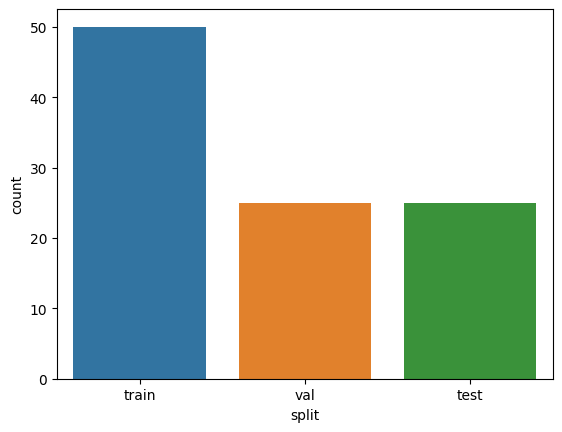

In [22]:
sns.countplot(x = 'split', data = pivot_df_sample)
pivot_df_sample.to_csv("nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/COPD_cases_GE_SPIE.csv", index = False)

### Adding labels to the split data

In [4]:
copd_gold = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/COPD_cases_GE_SPIE.csv")
copd_gold

,PatientID,SeriesUID_BONE,SeriesUID_STANDARD,split
0,COPDGene_A16009,1.2.840.113619.2.55.3.3852317604.741.128769737...,1.2.840.113619.2.55.3.3852317604.741.128769737...,train
1,COPDGene_A24802,1.2.840.113619.2.55.3.2831167752.727.122840803...,1.2.840.113619.2.55.3.2831167752.727.122840803...,train
2,COPDGene_A43240,1.2.840.113619.2.55.3.3852317604.390.127197598...,1.2.840.113619.2.55.3.3852317604.390.127197598...,val
3,COPDGene_A67397,1.2.840.113619.2.55.3.279720240.88.1254409500.988,1.2.840.113619.2.55.3.279720240.88.1254409501....,train
4,COPDGene_A85812,1.2.840.113619.2.108.3994720393.8979.123961898...,1.2.840.113619.2.108.3994720393.8979.123961899...,train
...,...,...,...,...
95,COPDGene_Q08973,1.2.840.113619.2.55.1.1762927041.1880.12245951...,1.2.840.113619.2.55.1.1762927041.1880.12245951...,train
96,COPDGene_Q53485,1.2.840.113619.2.55.3.2831167752.160.127557716...,1.2.840.113619.2.55.3.2831167752.160.127557716...,test
97,COPDGene_Q53566,1.2.840.113619.2.108.1627440376.19952.12410426...,1.2.840.113619.2.108.1627440376.20406.12410432...,train
98,COPDGene_Q59293,1.2.840.113619.2.55.1.1762927041.1884.12235503...,1.2.840.113619.2.55.1.1762927041.1884.12235503...,train


In [3]:
##Add GOLD labels to the train test split file for the controls 
gold = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/final_paired_data_spreadsheets/COPD_GE_pairedkernels_100randomsamples_GOLDlabels.csv")
gold

,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer,Inspiration_Expiration,Body Site,Case/control,Consent code,Consent,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,COPDGene_A16009,BONE,COPDGene_A16009_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,chest,case,1,HMB,phs000179,GOLD_2,CT,d1978801,Caucasian,female
1,COPDGene_A16009,STANDARD,COPDGene_A16009_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_2,CT,d1978801,Caucasian,female
2,COPDGene_A24802,STANDARD,COPDGene_A24802_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_4,CT,d1991634,Caucasian,male
3,COPDGene_A24802,BONE,COPDGene_A24802_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,chest,case,1,HMB,phs000179,GOLD_4,CT,d1991634,Caucasian,male
4,COPDGene_A43240,STANDARD,COPDGene_A43240_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_2,CT,d1978082,Caucasian,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,COPDGene_Q53566,STANDARD,COPDGene_Q53566_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_3,CT,d1979703,Caucasian,male
196,COPDGene_Q59293,BONE,COPDGene_Q59293_INSP_SHARP,GE MEDICAL SYSTEMS,INSP_SHARP,chest,case,1,HMB,phs000179,GOLD_2,CT,d1990430,African,female
197,COPDGene_Q59293,STANDARD,COPDGene_Q59293_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_2,CT,d1990430,African,female
198,COPDGene_Q70095,STANDARD,COPDGene_Q70095_EXP_STD,GE MEDICAL SYSTEMS,EXP_STD,chest,case,1,HMB,phs000179,GOLD_3,CT,d1980077,Caucasian,female


In [6]:
#Get the gold classification for the corresponding patients
for index, row in gold.iterrows():
    pid = row['PatientID']
    gold_label = row['GOLD classification']
    copd_gold.loc[copd_gold['PatientID'] == pid, 'GOLD'] = gold_label

copd_gold

,PatientID,SeriesUID_BONE,SeriesUID_STANDARD,split,GOLD
0,COPDGene_A16009,1.2.840.113619.2.55.3.3852317604.741.128769737...,1.2.840.113619.2.55.3.3852317604.741.128769737...,train,GOLD_2
1,COPDGene_A24802,1.2.840.113619.2.55.3.2831167752.727.122840803...,1.2.840.113619.2.55.3.2831167752.727.122840803...,train,GOLD_4
2,COPDGene_A43240,1.2.840.113619.2.55.3.3852317604.390.127197598...,1.2.840.113619.2.55.3.3852317604.390.127197598...,val,GOLD_2
3,COPDGene_A67397,1.2.840.113619.2.55.3.279720240.88.1254409500.988,1.2.840.113619.2.55.3.279720240.88.1254409501....,train,GOLD_4
4,COPDGene_A85812,1.2.840.113619.2.108.3994720393.8979.123961898...,1.2.840.113619.2.108.3994720393.8979.123961899...,train,GOLD_2
...,...,...,...,...,...
95,COPDGene_Q08973,1.2.840.113619.2.55.1.1762927041.1880.12245951...,1.2.840.113619.2.55.1.1762927041.1880.12245951...,train,GOLD_2
96,COPDGene_Q53485,1.2.840.113619.2.55.3.2831167752.160.127557716...,1.2.840.113619.2.55.3.2831167752.160.127557716...,test,GOLD_2
97,COPDGene_Q53566,1.2.840.113619.2.108.1627440376.19952.12410426...,1.2.840.113619.2.108.1627440376.20406.12410432...,train,GOLD_3
98,COPDGene_Q59293,1.2.840.113619.2.55.1.1762927041.1884.12235503...,1.2.840.113619.2.55.1.1762927041.1884.12235503...,train,GOLD_2


In [7]:
copd_gold.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/COPD_cases_GE_SPIE.csv", index = False)

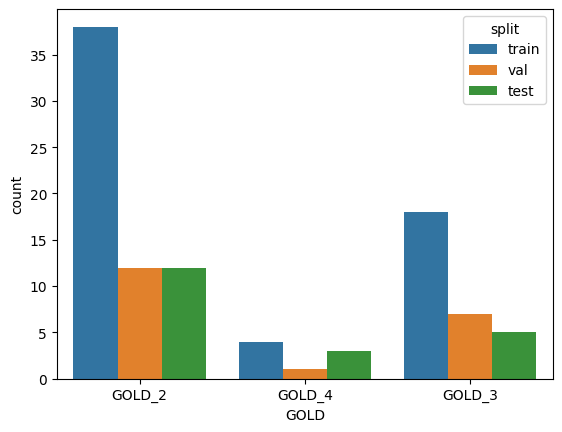

In [9]:
#Stack the gold criteria for cases
sns.countplot(x = 'GOLD', data = copd_gold, hue = 'split')

In [11]:
copd_controls = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/COPD_controls_SPIE.csv")
copd_controls

,PatientID,SeriesUID_BONE,SeriesUID_STANDARD,split
0,COPDGene_A61757,1.2.840.113619.2.55.3.2831167752.649.124715154...,1.2.840.113619.2.55.3.2831167752.649.124715154...,test
1,COPDGene_B15777,1.2.840.113619.2.55.1.1762928497.1882.12119709...,1.2.840.113619.2.55.1.1762928497.1882.12119709...,train
2,COPDGene_B17236,1.2.840.113619.2.108.1627440376.17625.12289430...,1.2.840.113619.2.108.1627440376.17625.12289430...,test
3,COPDGene_B17317,1.2.840.113619.2.55.3.279720240.266.1262968325...,1.2.840.113619.2.55.3.279720240.266.1262968325...,train
4,COPDGene_B38216,1.2.840.113619.2.55.3.2831167752.615.125121230...,1.2.840.113619.2.55.3.2831167752.615.125121230...,train
5,COPDGene_B72303,1.2.840.113619.2.181.33975605383.15934.1228750...,1.2.840.113619.2.181.33975605383.15934.1228750...,train
6,COPDGene_C05262,1.2.840.113619.2.55.3.2474697517.580.125300873...,1.2.840.113619.2.55.3.2474697517.580.125300874...,train
7,COPDGene_C11750,1.2.840.113619.2.181.33975596212.25851.1225315...,1.2.840.113619.2.181.33975596212.25851.1225315...,val
8,COPDGene_C19536,1.2.840.113619.2.55.3.2831167752.750.124991734...,1.2.840.113619.2.55.3.2831167752.750.124991734...,val
9,COPDGene_C40785,1.2.840.113619.2.55.3.2831167752.940.130141137...,1.2.840.113619.2.55.3.2831167752.940.130141137...,test


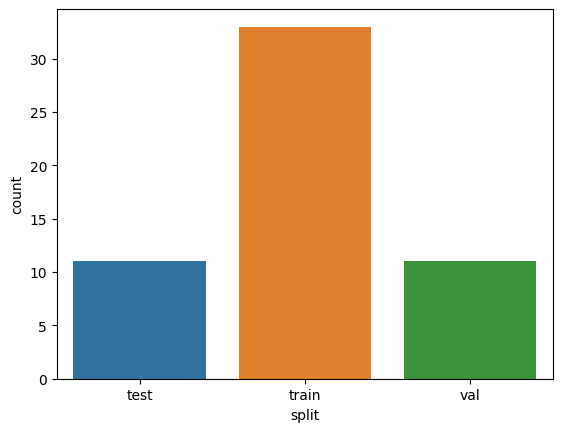

In [12]:
sns.countplot(x = 'split', data = copd_controls)